### 1. Загрузка данных и предобработка

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings
# Игнорировать все предупреждения
warnings.simplefilter("ignore")

In [5]:
# Загружаем данные из локального файла
df = pd.read_csv("/Users/olegsuhov/Downloads/titanic.csv")

# Просматриваем информацию о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Проверяем пропущенные значения
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Удаляем ненужные столбцы
df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'], inplace=True)

# Заполняем пропущенные значения возраста медианой
df['Age'].fillna(df['Age'].median(), inplace=True)

# Заполняем пропущенные значения порта отправления самым популярным значением
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Преобразуем категориальные признаки в числовые
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Проверяем финальную структуру датасета
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


### 2. Создание модели классификации (Logistic Regression)

In [8]:
# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Предсказание
predictions = model.predict(X_test)

# Оценка модели
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### 3. Анализ признаков (Корреляция, Гистограммы, Визуализация)

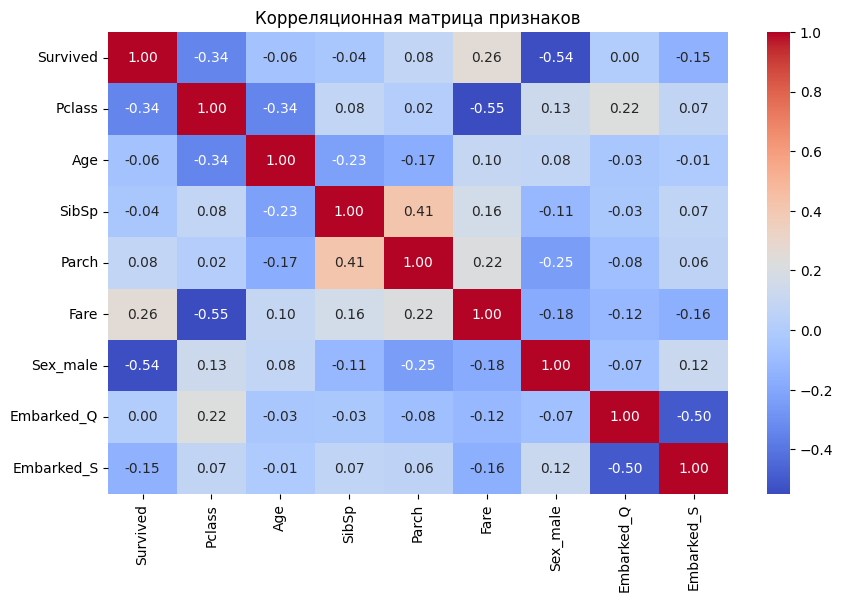

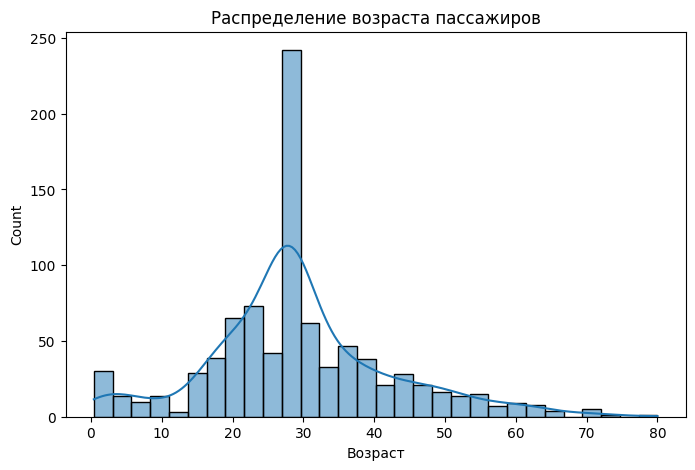

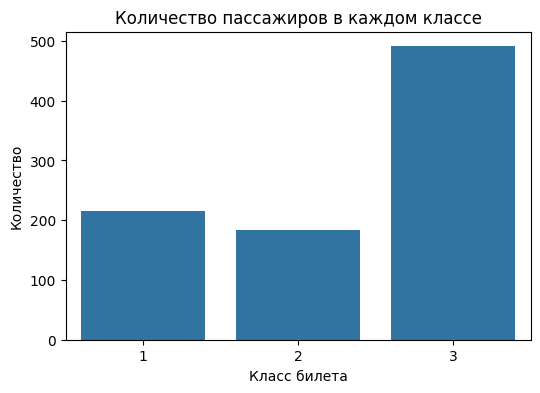

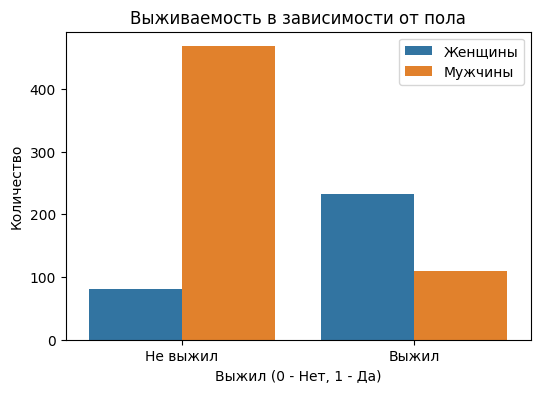

In [9]:
# Корреляционная матрица
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица признаков")
plt.show()

# Гистограмма возрастного распределения пассажиров
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Распределение возраста пассажиров")
plt.xlabel("Возраст")
plt.show()

# Количество пассажиров по классам
plt.figure(figsize=(6, 4))
sns.countplot(x="Pclass", data=df)
plt.title("Количество пассажиров в каждом классе")
plt.xlabel("Класс билета")
plt.ylabel("Количество")
plt.show()

# Доля выживших среди мужчин и женщин
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", hue="Sex_male", data=df)
plt.title("Выживаемость в зависимости от пола")
plt.xlabel("Выжил (0 - Нет, 1 - Да)")
plt.ylabel("Количество")
plt.xticks([0, 1], ["Не выжил", "Выжил"])
plt.legend(["Женщины", "Мужчины"])
plt.show()

### 4. Анализ стоимости билетов и возраста

Корреляция между ценой билета и возрастом: 0.10


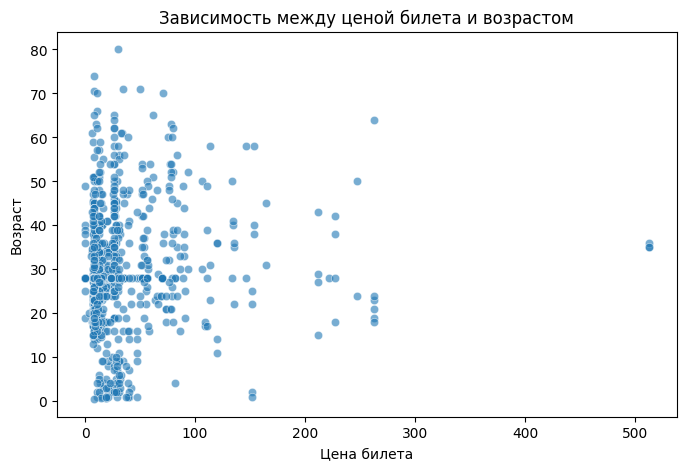

In [10]:
# Корреляция между возрастом и ценой билета
correlation = df['Fare'].corr(df['Age'])
print(f'Корреляция между ценой билета и возрастом: {correlation:.2f}')

# Диаграмма рассеяния (Fare vs. Age)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Fare'], y=df['Age'], alpha=0.6)
plt.title("Зависимость между ценой билета и возрастом")
plt.xlabel("Цена билета")
plt.ylabel("Возраст")
plt.show()

### 5. Проверка зависимости выживаемости от класса и цены билета

In [11]:
# Средняя выживаемость по классу билета
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("Средняя выживаемость по классу билета:\n", survival_by_class)

# Средняя выживаемость по цене билета
df['Fare_bin'] = pd.qcut(df['Fare'], 5)  # Разбиваем цену билета на 5 групп
survival_by_fare = df.groupby('Fare_bin')['Survived'].mean()
print("\nСредняя выживаемость по стоимости билета:\n", survival_by_fare)

Средняя выживаемость по классу билета:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Средняя выживаемость по стоимости билета:
 Fare_bin
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.679]       0.424419
(21.679, 39.688]     0.444444
(39.688, 512.329]    0.642045
Name: Survived, dtype: float64


### 6. Балансировка классов (Undersampling & Oversampling)

In [12]:
# Разделяем на мажоритарный и миноритарный классы
majority_class = df[df['Survived'] == 0]
minority_class = df[df['Survived'] == 1]

# Undersampling (уменьшаем размер мажоритарного класса)
majority_downsampled = majority_class.sample(n=len(minority_class), random_state=42)
df_balanced_undersampling = pd.concat([majority_downsampled, minority_class])

# Oversampling (дублируем миноритарный класс)
minority_upsampled = minority_class.sample(n=len(majority_class), replace=True, random_state=42)
df_balanced_oversampling = pd.concat([majority_class, minority_upsampled])

# Проверяем баланс классов
print("Распределение классов после undersampling:")
print(df_balanced_undersampling['Survived'].value_counts())

print("\nРаспределение классов после oversampling:")
print(df_balanced_oversampling['Survived'].value_counts())

Распределение классов после undersampling:
Survived
0    342
1    342
Name: count, dtype: int64

Распределение классов после oversampling:
Survived
0    549
1    549
Name: count, dtype: int64


### 7. Обучение модели после балансировки классов

In [15]:
# Выделяем признаки и целевую переменную после балансировки (oversampling)
X_bal = df_balanced_oversampling.drop("Survived", axis=1)
y_bal = df_balanced_oversampling["Survived"]

# Преобразуем столбцы с типом Interval в числа (среднее значение интервала)
for column in X_bal.select_dtypes(include=["interval"]).columns:
    X_bal[column] = X_bal[column].apply(lambda x: (x.left + x.right) / 2)

# Преобразуем категориальные признаки в числовые с помощью get_dummies
X_bal = pd.get_dummies(X_bal)

# Разделяем данные на обучающую и тестовую выборки
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# Создаем и обучаем модель логистической регрессии
balanced_model = LogisticRegression(max_iter=500)
balanced_model.fit(X_train_bal, y_train_bal)

# Делаем предсказания и оцениваем модель
y_pred_bal = balanced_model.predict(X_test_bal)
print(f"Accuracy после балансировки: {accuracy_score(y_test_bal, y_pred_bal):.4f}")
print("\nClassification Report после балансировки:\n", classification_report(y_test_bal, y_pred_bal))

Accuracy после балансировки: 0.7818

Classification Report после балансировки:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       119
           1       0.78      0.72      0.75       101

    accuracy                           0.78       220
   macro avg       0.78      0.78      0.78       220
weighted avg       0.78      0.78      0.78       220

